# Abgabe 1 - 24 April 2021 Team 08

In [85]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [86]:
# titanic.csv Datensatz laden
titanic = pd.read_csv("titanic.csv", sep=",")

In [87]:
# Datensatz anzeigen
titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [88]:
# Alter kategorisieren
titanic['age2'] = pd.cut(titanic['age'], [0, 18, 30,50,60,70]) 

In [89]:
# Unerwarteter Zusammenhang zwischen "Embark Town" und Überlebensrate
titanic[['embark_town','survived']].groupby('embark_town').mean()

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


array([[<AxesSubplot:title={'center':'Cherbourg'}>,
        <AxesSubplot:title={'center':'Queenstown'}>],
       [<AxesSubplot:title={'center':'Southampton'}>, <AxesSubplot:>]],
      dtype=object)

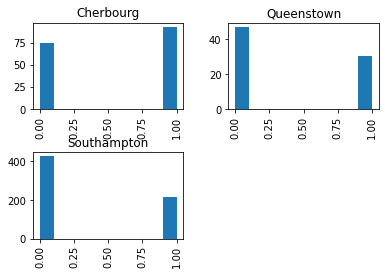

In [90]:
titanic.hist(column='survived', by='embark_town')

In [ ]:
# Hypothese: die Variablen Geschlecht, Klasse und Alter stehen in Zusammenhang mit der Überlebensrate
# Hypothese überprüfen: Ist die Abhängigkeit von Embark Town und Überleben kausal oder ist es ein indirekter Zusammenhang aufgrund von Alter, Klasse oder Geschlecht?

In [ ]:
# Hypothese: Passagiere aus Cherbourg haben eher überlebt

In [91]:
# Überprüfen, was für Passagiere in Cherbourg (Alter, Klasse, Geschlecht) eingestiegen sind
# 1: Geschlecht
titanic.pivot_table('pclass', 'survived', ['embark_town', 'sex'], aggfunc ='count', margins=True)

embark_town Cherbourg      Queenstown      Southampton       All
sex            female male     female male      female male     
survived                                                        
0                   9   66          9   38          63  364  549
1                  64   29         27    3         140   77  340
All                73   95         36   41         203  441  889

In [92]:
# Frauenanteil an zusteigenden Passagieren kalkulieren
def calcFemale(location):
    total = titanic[(titanic["embarked"] == location)].count().survived
    female = titanic[ (titanic["embarked"] == location) & (titanic["sex"] == "female") ].count().survived
    return round(female / total,3)

In [93]:
# Frauenanteile:
print (f'Female Passangers: \nSouthhampton: {calcFemale("S")}\nCherbourg: {calcFemale("C")}\nQueenstown: {calcFemale("Q")}')

# Erkentnis: In Cherbourg und Queenstown sind prozentual mehr Frauen als in Southhampton zugestiegen.

Female Passangers: 
Southhampton: 0.315
Cherbourg: 0.435
Queenstown: 0.468


In [94]:
titanic.pivot_table('survived', ['embark_town', 'sex'], margins=True)
# Erkentnis: In allen Zustiegsorten war die Überlebensrate der Frauen wesentlich höher als die der Männer.

survived
embark_town sex             
Cherbourg   female  0.876712
            male    0.305263
Queenstown  female  0.750000
            male    0.073171
Southampton female  0.689655
            male    0.174603
All                 0.382452

In [95]:
# Annahme: Da in Cherbourg verhältnismäßig viele Frauen zugestiegen sind und Frauen eine höhere Überlebensrate haben, lässt sich die ein Teil der Überlebensrate für Cherbourg hierdurch erklären. 
# Da in Queenstown die Überlebensrate geringer war, jedoch verhältnismäßig mehr Frauen zugestiegen sind, kann diese Variable allein nicht ausschlaggebend sein.

In [96]:
# 2: Gebuchte Klasse
titanic.pivot_table('pclass', 'survived', ['embark_town', 'class'], aggfunc ='count', margins=True)

embark_town Cherbourg              Queenstown              Southampton         \
class           First Second Third      First Second Third       First Second   
survived                                                                        
0                  26      8    41          1      1    45          53     88   
1                  59      9    25          1      2    27          74     76   
All                85     17    66          2      3    72         127    164   

embark_town        All  
class       Third       
survived                
0             286  549  
1              67  340  
All           353  889

In [97]:
titanic.pivot_table('survived', ['embark_town', 'class'], margins=True)
# Feststellung: Die Überlebensrate der Passagiere in der ersten Klasse ist bei Southhampton und Cherbourg am höchsten.
#               Da Queenstown nur 2 Passagiere der ersten Klasse hatte, kann hier keine verlässliche Aussage getroffen werden.

survived
embark_town class           
Cherbourg   First   0.694118
            Second  0.529412
            Third   0.378788
Queenstown  First   0.500000
            Second  0.666667
            Third   0.375000
Southampton First   0.582677
            Second  0.463415
            Third   0.189802
All                 0.382452

In [98]:
# "Erste Klasse"-Anteil an zusteigenden Passagieren kalkulieren
def calcClass(location, booked):
    total = titanic[(titanic["embarked"] == location)].count().survived
    firstClass = titanic[ (titanic["embarked"] == location) & (titanic["pclass"] == booked) ].count().survived
    return round(firstClass / total,3)

In [99]:
print (f'First Class: \nSouthhampton: {calcClass("S", 1)}\nCherbourg: {calcClass("C", 1)}\nQueenstown: {calcClass("Q", 1)}\n')
print (f'Second Class: \nSouthhampton: {calcClass("S", 2)}\nCherbourg: {calcClass("C", 2)}\nQueenstown: {calcClass("Q", 2)}\n')
print (f'Third Class: \nSouthhampton: {calcClass("S", 3)}\nCherbourg: {calcClass("C", 3)}\nQueenstown: {calcClass("Q", 3)}\n')

# Erkenntnis: In Cherbourg sind zu über 50% Passagiere der ersten Klasse zugestiegen.

# Annahme: Da die Überlebensrate der Passagiere der ersten Klasse am höchsten ist, kann diese Variable ausschlaggebend für das bessere Abschneiden der Überlebensrate von Cherbourg sein.

# Notiz: Interessant ist, dass in Queenstown fast nur Passagiere der 3. Klasse zugestiegen sind, jedoch die Überlebensrate knapp höher war als bei Southhampton. Evtl. lässt sich diese kleinere Abweichung durch den höheren Anteil an zugestiegenen weiblichen Passagieren in Queenstown erklären.

First Class: 
Southhampton: 0.197
Cherbourg: 0.506
Queenstown: 0.026

Second Class: 
Southhampton: 0.255
Cherbourg: 0.101
Queenstown: 0.039

Third Class: 
Southhampton: 0.548
Cherbourg: 0.393
Queenstown: 0.935



In [101]:
# 3: Alter
titanic.pivot_table('survived', ['embark_town', 'age2'], margins=True)

survived
embark_town age2              
Cherbourg   (0, 18]   0.714286
            (18, 30]  0.586957
            (30, 50]  0.585366
            (50, 60]  0.666667
            (60, 70]  0.000000
Queenstown  (0, 18]   0.375000
            (18, 30]  0.500000
            (30, 50]  0.111111
            (50, 60]  0.000000
            (60, 70]  0.000000
Southampton (0, 18]   0.456311
            (18, 30]  0.300926
            (30, 50]  0.400000
            (50, 60]  0.310345
            (60, 70]  0.214286
All                   0.405941

In [116]:
titanic.pivot_table('survived', ['embark_town', 'age2'], aggfunc ='count', margins=True)
# Erkenntnis: in Cherbourg haben im Verhältnis am meisten Passagiere der Altersklasse 0-18 überlebt, aber Fallzahlen sind zu gering, um nennenswerte Aussage treffen zu können
# Erkenntnis (Nach Ansicht in Excel): Für alle Orte sind nur eingeschränkte Altersinformationen gegeben. Informationen über "adult_male" sind jedoch vorhanden.

survived
embark_town age2              
Cherbourg   (0, 18]         28
            (18, 30]        46
            (30, 50]        41
            (50, 60]        12
            (60, 70]         1
Queenstown  (0, 18]          8
            (18, 30]         8
            (30, 50]         9
            (50, 60]         1
            (60, 70]         1
Southampton (0, 18]        103
            (18, 30]       216
            (30, 50]       190
            (50, 60]        29
            (60, 70]        14
All                        707

In [133]:
# Überprüfen eines kombinierten Alter / Geschlecht Merkmals:

def calcAdultMale (location):
    total = titanic[(titanic["embarked"] == location)].count().survived
    adultMale = titanic[ (titanic["embarked"] == location) & (titanic["adult_male"] == True) ].count().survived
    return round(adultMale / total,3)

print (f'Adult Males: \nSouthhampton: {calcAdultMale("S")}\nCherbourg: {calcAdultMale("C")}\nQueenstown: {calcAdultMale("Q")} \n')

adultMaleSurvivors = titanic[(titanic["adult_male"] == True) & (titanic["survived"] == 1)].survived.count()
adultMaleTotal = titanic[(titanic["adult_male"] == True)].survived.count()

adultRichMaleSurvivors = titanic[(titanic["adult_male"] == True) & (titanic["survived"] == 1) & (titanic["pclass"] == 1)].survived.count()
adultRichMaleTotal = titanic[(titanic["adult_male"] == True)  & (titanic["pclass"] == 1)].survived.count()

otherSurvivors = titanic[(titanic["adult_male"] == False) & (titanic["survived"] == 1)].survived.count()
otherTotal = titanic[(titanic["adult_male"] == False)].survived.count()

print (f'Adult male survival rate total: { adultMaleSurvivors / adultMaleTotal } \n')
print (f'Others survival rate total: { otherSurvivors / otherTotal } \n')
print (f'Rich male survival rate total: { adultRichMaleSurvivors / adultRichMaleTotal } \n')

titanic.pivot_table('survived', ['embark_town', 'adult_male'], margins=True)

# Erkenntnis: In Southampton sind mehr männliche Erwachsene zugestiegen. Die Überlebensrate der männlichen Erwachsenen ist gesamt betrachtet wesentlich geringer als die des Rests. Auch dies kann zu der niedrigen Überlebensrate von Southhampton beigetragen haben.

Adult Males: 
Southhampton: 0.637
Cherbourg: 0.536
Queenstown: 0.481 

Adult male survival rate total: 0.16387337057728119 

Others survival rate total: 0.7175141242937854 

Rich male survival rate total: 0.35294117647058826 



survived
embark_town adult_male          
Cherbourg   False       0.858974
            True        0.288889
Queenstown  False       0.675000
            True        0.081081
Southampton False       0.675214
            True        0.143902
All                     0.382452

In [82]:
# Übersicht
titanic.pivot_table('pclass', 'survived', ['embark_town', 'class', 'sex'], aggfunc ='count', margins=True)

embark_town Cherbourg                                 Queenstown              \
class           First       Second        Third            First      Second   
sex            female  male female  male female  male     female male female   
survived                                                                       
0                 1.0  25.0    NaN   8.0    8.0  33.0        NaN  1.0    NaN   
1                42.0  17.0    7.0   2.0   15.0  10.0        1.0  NaN    2.0   
All              43.0  42.0    7.0  10.0   23.0  43.0        1.0  1.0    2.0   

embark_town                   Southampton                                   \
class             Third             First       Second        Third          
sex         male female  male      female  male female  male female   male   
survived                                                                     
0            1.0    9.0  36.0         2.0  51.0    6.0  82.0   55.0  231.0   
1            NaN   24.0   3.0        46.0  28.0   61.0  15.0   33.0   34.0   
All          1.0   33.0  39.0        48.0  79.0   67.0  97.0   88.0  265.0   

embark_town  All  
class             
sex               
survived          
0            549  
1            340  
All          889

Ergebnis: Aufgrund der Zusammenhänge zwischen Klasse und Geschlecht mit der Überlebensrate und dem Embark Town kann davon ausgegangen werden, dass der Zusammenhang zwischen Embark Town und Überlebensrate durch den Zusammenhang zwischen Klasse und Überlebensrate bzw. Geschlecht und Überlebensrate beschrieben werden kann.